# Windy Gridworld

### Ex 6.9
Re-solve the windy gridworld assuming eight possible actions, including the diagonal moves, 
rather than four.

How much better can you do with the extra actions? Can you do even better by including
a ninth action that causes no movement at all other than that caused by the wind?

### Ex 6.10

Re-solve the windy gridworld task with
King’s moves, assuming that the effect of the wind, if there is any, is stochastic, sometimes
varying by 1 from the mean values given for each column. That is, a third of the time
you move exactly according to these values, as in the previous exercise, but also a third
of the time you move one cell above that, and another third of the time you move one
cell below that. For example, if you are one cell to the right of the goal and you move
left, then one-third of the time you move one cell above the goal, one-third of the time
you move two cells above the goal, and one-third of the time you move to the goal.

episode: 0
episode: 100
episode: 200
episode: 300
episode: 400
episode: 500
episode: 600
episode: 700
episode: 800
episode: 900
episode: 1000
episode: 1100
episode: 1200
episode: 1300
episode: 1400
episode: 1500
episode: 1600
episode: 1700
episode: 1800
episode: 1900


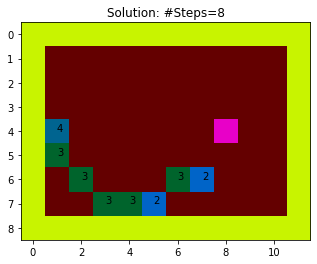

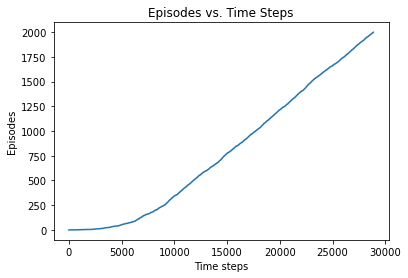

episode: 0
episode: 100
episode: 200
episode: 300
episode: 400
episode: 500
episode: 600
episode: 700
episode: 800
episode: 900
episode: 1000
episode: 1100
episode: 1200
episode: 1300
episode: 1400
episode: 1500
episode: 1600
episode: 1700
episode: 1800
episode: 1900


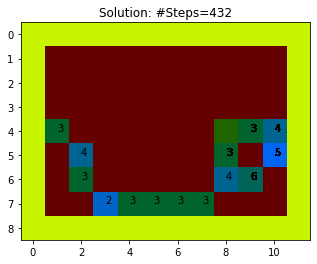

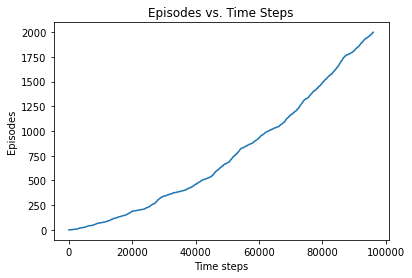

In [2]:
from gym_minigrid.wrappers import FullyObsWrapper

import gym
import gym_minigrid
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline


'''
Windy Gridworld

Agent is trained using gym_minigrid
https://github.com/maximecb/gym-minigrid
FullyObsWrapper used to simplify observations

Custom environment "windy.py" adds king's moves & wind
'''

def get_position(obs):
    '''
    Get agent's position from state observations
    
    Parameters
    ----------
        obs : dict
            Observations
    Returns
    -------
        tuple
            Agent's position
    '''
    return (np.where(obs['image'][:,:,0] == 10)[0][0], 
            np.where(obs['image'][:,:,0] == 10)[1][0])

def choose_action(s, Q, epsilon):
    '''
    Chooses epsilon-greedy action
    
    Parameters
    ----------
        s : tuple
            Agent's position
        Q : ndarray
            Action-values
        epsilon : float
            Greediness parameter
    Returns
    -------
        int
            Action to be taken
    '''
    i = random.uniform(0, 1)
    if i < epsilon:
        return random.randint(0, Q.shape[-1] - 1)
    else:
        return np.argmax(Q[s])

def train(alpha, gamma, max_episode, env):
    '''
    Train agent using Sarsa
    
    Parameters
    ----------
        alpha : float
            Convergence parameter
        gamma : float
            Discount parameter
        max_episode : int
            Maximum episodes to run
        env : gym environment
            Environment to train in
    
    Returns
    -------
        ndarray
            Optimal action-values
        list
            episode # at timestep
    '''
    Q = np.zeros((10+2, 7+2, 9))
    episode = 0
    t = []
    while episode < max_episode:
        if episode % 100 == 0:
            print('episode: {}'.format(episode))
        obs = env.reset()
        done = False
        s = get_position(obs)
        a = choose_action(s, Q, 0.1)

        while not done:
            obs, reward, done, info = env.step(a)
            sp = get_position(obs)
            ap = choose_action(sp, Q, 0.1)
            SA = (s[0], s[1], a)
            SAp = (sp[0], sp[1], ap)
            Q[SA] = Q[SA] + alpha * (reward + gamma * Q[SAp] - Q[SA])
            s = sp
            a = ap
            t.append(episode)
        env.close()
        episode += 1
    
    return Q, t

def eval(Q, env):
    '''
    Evaluates performance of agent in environment
    
    Parameters
    ----------
        Q : ndarray
            Optimal action-values
        env : gym environment
            Environment to evaluate agent in
    Returns
    -------
        int
            # Steps to complete task
        list
            Coordinates of agent
        list
            Actions of agent
        dict
            Final state observation of agent
    '''
    env = gym.make('MiniGrid-Windy-10x7-v0')
    env = FullyObsWrapper(env)
    obs = env.reset()
    done = False
    cuml_reward = 0
    positions = []
    actions = []
    
    while not done:
        s = get_position(obs)
        positions.append(s)
        a = choose_action(s, Q, 0.0)
        actions.append(a)
        obs, reward, done, info = env.step(a)
        cuml_reward += reward
        
    return cuml_reward, positions, actions, obs

def run(env):
    alpha = 0.5
    gamma = 1.0
    max_episode = 2000
    
    Q, t = train(alpha, gamma, max_episode, env)
    env = gym.make('MiniGrid-Windy-10x7-v0')
    env = FullyObsWrapper(env)
    cuml_reward, positions, actions, obs = eval(Q, env)
    
    fig, ax = plt.subplots()
    img = obs['image']
    for pos, act in zip(positions, actions):
        img[pos] = [0, 1, act]
        ax.text(pos[0], pos[1], img[pos][-1])
    img = np.transpose(img, (1,0,2))
        
    ax.imshow(img * 100)
    ax.set_title('Solution: #Steps={}'.format(-1 * cuml_reward))
    plt.show()
    
    plt.figure()
    plt.plot(t)
    plt.title('Episodes vs. Time Steps')
    plt.xlabel('Time steps')
    plt.ylabel('Episodes')
    plt.show()

if __name__ == '__main__':
    # Ex 6.9
    env = gym.make('MiniGrid-Windy-10x7-v0')
    env = FullyObsWrapper(env)
    run(env)
    
    #Ex 6.10
    env = gym.make('MiniGrid-WindyStochastic-10x7-v0')
    env = FullyObsWrapper(env)
    run(env)